# Data Visualization: Compositions with Pie/Donut charts

## Objectives:
* Use pie/donut charts to show the compositions of data variables.
* Identify use cases for pie/donut charts.
* Draw basic pie charts based on given guidelines using matplotlib.
* Draw single/multi-level donut charts in matplotlib. 

## Introduction to Pie Charts

A pie chart (or a circle chart) is a circular statistical graphic which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice (and consequently its central angle and area), is proportional to the quantity it represents. While it is named for its resemblance to a pie which has been sliced, there are variations on the way it can be presented ([wiki](https://en.wikipedia.org/wiki/Pie_chart)). 
![](pie-chart-a.gif)

Pie charts are perhaps the most ubiquitous chart type as they are found in newspapers, business reports, television etc. But few people actually understand the function of the pie chart and how to use it properly. In addition to issues like using too many categories, the biggest problem is getting the basic idea right i.e. **the pie slices must sum up to a meaningful whole.**

### When not to use Pie Charts

There are some simple criteria that you can use to determine whether a pie chart is the right choice for your data - or not.

* **Do the parts make up a meaningful whole?** If not, use a different chart. 

* **Are the parts mutually exclusive?** If there is overlap between the parts, use a different chart.

* **Do you want to compare the parts to each other or the parts to the whole?** If the main purpose is to compare between the parts, use a different chart. 

* **How many parts do you have?** If there are too many parts and slices are hard to visualize, use a different chart. 



### Pie charts with `matplotlib`

We can plot pie charts in matplotlib with `.pie()` method. The basic pie chart method ingests arrays of values (x) and corresponding labels. The fractional area of each wedge in the pie is given by x/sum(x). The wedges are plotted counterclockwise, by default starting from the x-axis.

Let's try this with a simple example showing the number of users of different programming languages in a tech business. One assumption we are making here that other languages, besides these four are either non-existent, or their impact is negligible so we can consider the four shown below to compose a *whole*. Also, We shall not apply any customization at this stage. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

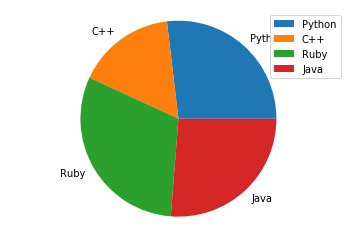

In [2]:
# Create data to plot
labels = ['Python', 'C++', 'Ruby', 'Java']
sizes = [215, 130, 245, 210]

# Plot a pie chart and show the legend
plt.pie(sizes, labels=labels)
plt.legend(labels)

# Use "equal" aspect ratio to ensure the output is symmetrical 
plt.axis('equal')
plt.show()

Just like the bar chart examples we saw earlier, we will further customize the pie chart with: 

* Colors 
* The "explode" effect which allows you to pop out a slice for greater focus. 
* Display the values in percentages inside the slices with auto percentage `autopct` argument.
* Apply effects like drop shadows etc. 

A detailed list of arguments that can be used for customizing a pie chart can be found at [this location](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html).

Let's apply these customizations to above pie chart.

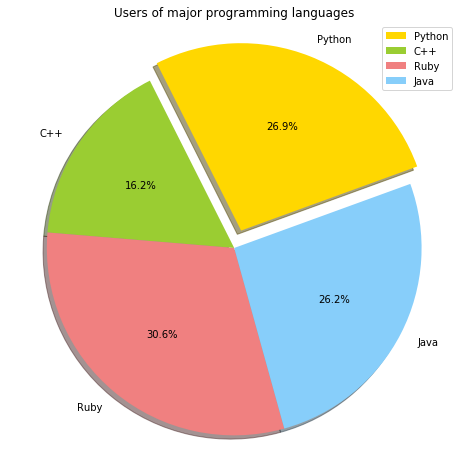

In [3]:
# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]

# Colors for each slice in the pie chart
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Explode one or more slices and set the level of explode between 0 and 1 
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Create a new figure space with a single axes
fig, ax = plt.subplots(figsize=(8,8))

# Create the pie chart with above data and customize by passing extra arguments
ax.pie(sizes, 
        explode=explode,    # Explode values for slices from the explode list
        labels=labels,      
        colors=colors,      # Color values for slices from colors list
        autopct='%1.1f%%',  # Auto percentage - 1 decimal point
        shadow=True,        # Set the drop shadow to true
        startangle=20)      # Set a start angle 

ax.legend(labels, loc="best")
ax.axis('equal')
ax.set_title('Users of major programming languages')
plt.show()

## Donut Charts

A donut chart is just a Pie Chart with an area of the centre cut out.

Pie Charts are criticised in data science community as they  focus on the proportional areas of the slices to one another and to the chart as a whole. This makes it difficult to see the differences between slices when you want to compare multiple Pie Charts together.

A Donut Chart remedies this problem by reducing the use of the area in a pie and increasing focuses on reading the length of the arcs, rather than comparing the proportions between slices. Donut Charts are also more space-efficient than Pie Charts because the blank space inside a Donut Chart can be used to display extra information. 

Method of making donut graph from pie chart in MatPlotLib is slightly complicated rather we can just change pie chart to donut chart by drawing a circle with white color at origin. This is achived by using `.circle()` method in matplotlib. `plt.gcf()` is used to to get a reference to the current figure , and `plt.gca()` is used to address current axes of a figure, when using pyplot. 

Let's use the data from previous example to draw a donut chart as shown below:

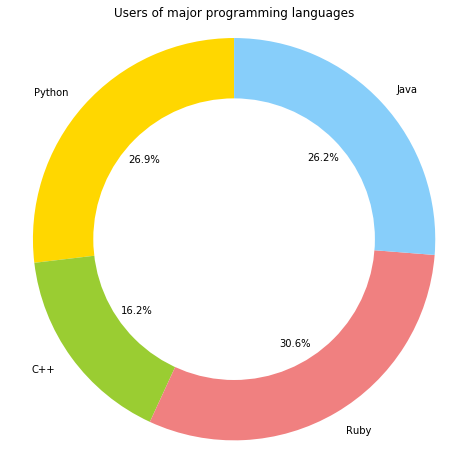

In [4]:
# Create a new figure space with a single axes
fig, ax = plt.subplots(figsize=(8,8))

# Draw a pie chart as seen earlier
ax.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a white colored circle at origin (0,0) with radius 0.7
centre_circle = plt.Circle((0,0),0.70, fc='white')

# Get a reference to the current figure
fig = plt.gcf()

# Get current axes of current figure
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal') 
ax.set_title('Users of major programming languages')

plt.show()

### Multi-Level Donut Charts
In above, we can clearly see that the focus has been shifted to the lengths of arcs instead of area occupied by these arcs. Let's add more data to this donut chart (something you cant readily do with a pie chart) and split each arc for male and female users. We shall take the  the following :

* Create a list of labels and colors for Male and Female users in each class
* Draw the pie charts and white centre
* Label and output the final figure

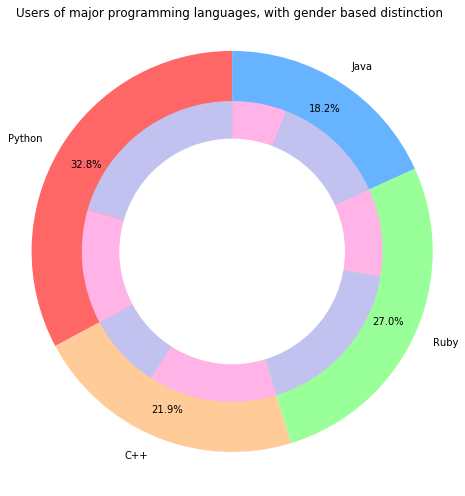

In [68]:
# Data to plot
sizes_gender = [315,189,125,212,270,145,190,90]
gender_groups = ["Male", "Female"]
gender_labels = gender_groups * 4
gcolors = ['#c2c2f0','#ffb3e6']
gender_colors = gcolors * 4

# Create a new figure space with a single axes
fig, ax = plt.subplots(figsize=(7,7))

# Draw two pie charts as seen earlier
ax.pie(sizes,
       radius = 0.8,
       autopct='%1.1f%%',
       pctdistance = 0.85,
       labels=labels, 
       colors=colors, 
       startangle=90,frame=True)

ax.pie(sizes_gender, 
       colors=gender_colors, 
       radius=0.6,
       startangle=90)

# Draw a white colored circle at origin (0,0) with radius 0.7
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)

# Get a reference to the current figure
fig = plt.gcf()

# Get current axes of current figure
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal') 
ax.set_title('Users of major programming languages, with gender based distinction ')

# Ensure both charts tightly align with each other
plt.tight_layout()

plt.show()

You can think about jazzing it up a bit more, or maybe a bit less depending upon the context of analysis. So we can see in some cases, where mutiple data elements has to be shown in terms of their composition, donut charts may be able to provide you more insight into data. You can think abou further customizations and ways to prettify these plots even more using the range of arguments that be passed into basic plotting functuions in matplotlib. 

## Summary:
In this lesson, we saw how to show composition of data variables using pie charts and donut charts. We looked at the use cases of both pie and donut charts and identified the sutuations where these techniques could indeed prove to be beneficial. 